<a href="https://colab.research.google.com/github/VaishKS/CIFAR10_CNN_PyTorch/blob/main/CNN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [3]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [4]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [5]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['deer', 'horse', 'frog', 'ship', 'airplane', 'bird', 'truck', 'cat', 'automobile', 'dog']


In [6]:
for i in range(len(classes)):
  class_name =  classes[i]
  files = os.listdir(data_dir + "/train/" + class_name)
  print('No. of training examples for ' + class_name + ':', len(files))

No. of training examples for deer: 5000
No. of training examples for horse: 5000
No. of training examples for frog: 5000
No. of training examples for ship: 5000
No. of training examples for airplane: 5000
No. of training examples for bird: 5000
No. of training examples for truck: 5000
No. of training examples for cat: 5000
No. of training examples for automobile: 5000
No. of training examples for dog: 5000


In [7]:
for i in range(len(classes)):
  class_name =  classes[i]
  files = os.listdir(data_dir + "/test/" + class_name)
  print('No. of testing examples for ' + class_name + ':', len(files))

No. of testing examples for deer: 1000
No. of testing examples for horse: 1000
No. of testing examples for frog: 1000
No. of testing examples for ship: 1000
No. of testing examples for airplane: 1000
No. of testing examples for bird: 1000
No. of testing examples for truck: 1000
No. of testing examples for cat: 1000
No. of testing examples for automobile: 1000
No. of testing examples for dog: 1000


In [8]:
#Load the data as PyTorch Tensors

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [9]:
img, label = dataset[4999]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.6118, 0.6078, 0.6118,  ..., 0.6157, 0.6118, 0.6078],
         [0.6196, 0.6157, 0.6196,  ..., 0.6196, 0.6157, 0.6157],
         [0.6157, 0.6118, 0.6118,  ..., 0.6157, 0.6118, 0.6078],
         ...,
         [0.6235, 0.6196, 0.6235,  ..., 0.6118, 0.6118, 0.6078],
         [0.6275, 0.6235, 0.6275,  ..., 0.6157, 0.6118, 0.6078],
         [0.6196, 0.6157, 0.6157,  ..., 0.6000, 0.5961, 0.5961]],

        [[0.6235, 0.6196, 0.6235,  ..., 0.6353, 0.6314, 0.6275],
         [0.6314, 0.6275, 0.6314,  ..., 0.6392, 0.6353, 0.6353],
         [0.6275, 0.6235, 0.6235,  ..., 0.6353, 0.6314, 0.6275],
         ...,
         [0.6431, 0.6392, 0.6431,  ..., 0.6431, 0.6431, 0.6392],
         [0.6471, 0.6431, 0.6471,  ..., 0.6471, 0.6431, 0.6392],
         [0.6392, 0.6353, 0.6353,  ..., 0.6314, 0.6275, 0.6275]],

        [[0.6431, 0.6392, 0.6392,  ..., 0.6471, 0.6431, 0.6392],
         [0.6510, 0.6471, 0.6510,  ..., 0.6510, 0.6471, 0.6471],
         [0.6471, 0.6431, 0.6431,  ..., 0.6471, 0.6431, 0.

In [10]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [12]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


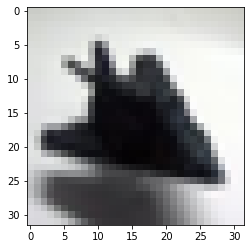

In [13]:
show_example(*dataset[0])

Label:  airplane (0)


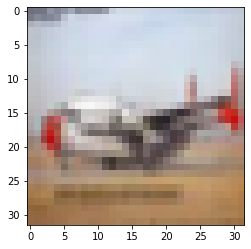

In [14]:
show_example(*dataset[1099])

In [15]:
# Create the validation set

random_seed = 42
torch.manual_seed(random_seed);

In [16]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [17]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [39]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [40]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

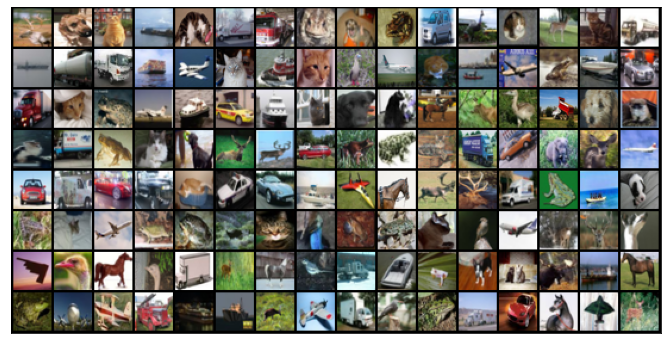

In [41]:
show_batch(train_dl)

## Defining the Model (Convolutional Neural Network)

In [42]:
def apply_kernel(image, kernel):
  ri, ci = image.shape #image dimensions
  rk, ck = kernel.shape #kernel dimensions
  ro, co = ri-rk+1, ci-ck+1 #output dimensions
  output = torch.zeros([ro, co])
  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
  return output

In [43]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [44]:
import torch.nn as nn
import torch.nn.functional as F

In [45]:
from torch.nn.modules.pooling import MaxPool3d
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [46]:
from matplotlib import image
for images, labels in train_dl:
  print("images.shape: ", images.shape)
  out = simple_model(images)
  print('out.shape: ', out.shape)
  break

images.shape:  torch.Size([128, 3, 32, 32])
out.shape:  torch.Size([128, 8, 16, 16])


In [47]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [48]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [49]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [50]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([-0.0115,  0.0379, -0.0354, -0.0376,  0.0118,  0.0298, -0.0097,  0.0212,
        -0.0171, -0.0176], grad_fn=<SelectBackward0>)


In [51]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [52]:
device = get_default_device()
device

device(type='cuda')

In [53]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

# Training the Model

In [54]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [55]:
model = to_device(Cifar10CnnModel(), device)

In [56]:
evaluate(model, val_dl)

{'val_acc': 0.10039062798023224, 'val_loss': 2.3036935329437256}

In [57]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [58]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.8191, val_loss: 1.4848, val_acc: 0.4460
Epoch [1], train_loss: 1.3101, val_loss: 1.1613, val_acc: 0.5793
Epoch [2], train_loss: 1.0365, val_loss: 0.9654, val_acc: 0.6578
Epoch [3], train_loss: 0.8486, val_loss: 0.8887, val_acc: 0.6893
Epoch [4], train_loss: 0.7159, val_loss: 0.8267, val_acc: 0.7155
Epoch [5], train_loss: 0.5894, val_loss: 0.7956, val_acc: 0.7351
Epoch [6], train_loss: 0.4782, val_loss: 0.8045, val_acc: 0.7427
Epoch [7], train_loss: 0.3714, val_loss: 0.8594, val_acc: 0.7376
Epoch [8], train_loss: 0.2743, val_loss: 0.9233, val_acc: 0.7488
Epoch [9], train_loss: 0.2096, val_loss: 1.0309, val_acc: 0.7446


In [59]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

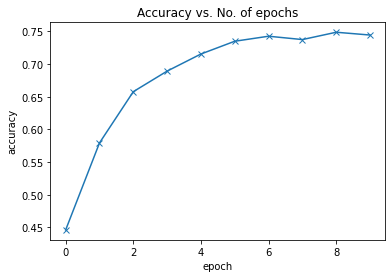

In [60]:
plot_accuracies(history)

In [61]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

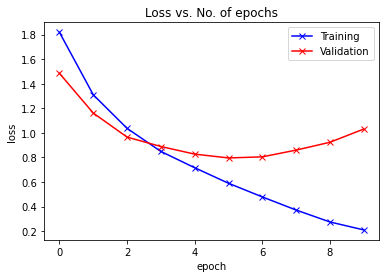

In [62]:
plot_losses(history)

# Testing with individual images

In [63]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [64]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


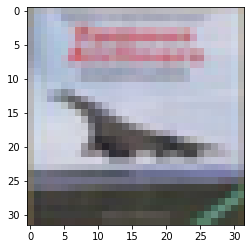

In [65]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


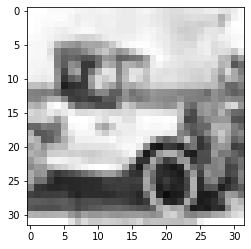

In [66]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


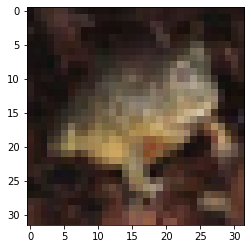

In [67]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [68]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.7431640625, 'val_loss': 1.048151969909668}

# Saving and loading the model

In [69]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

In [70]:
model2 = to_device(Cifar10CnnModel(), device)

In [71]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [72]:
evaluate(model2, test_loader)

{'val_acc': 0.7431640625, 'val_loss': 1.048151969909668}